<a href="https://colab.research.google.com/github/hosngholami/RecommenderSystem/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

API Yelp

In [ ]:
import requests

# API Key خود را اینجا وارد کنید
API_KEY = '3k_wLMNf6CwujHWVLSLnoZFLnuDLAkzBrLxfZU9GT5cG2tkgngTk3YcAD80AUOTE665dznOmk1LXWbVHFvtBehmk-ao0Dnzo7urxabgbhvXWcDzWSRNWfvoXm-cDZ3Yx'

# URL پایه برای درخواست‌ها
url = 'https://api.yelp.com/v3/businesses/SoSQhqqOaS10aUuxDr1YtA'

# سربرگ‌ها (Headers) با کلید API
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# پارامترهای جستجو (می‌توانید موقعیت جغرافیایی، نوع کسب‌وکار و غیره را مشخص کنید)
params = {
    # 'term': 'hotels',   # نوع کسب‌وکار
    'location': 'New York',  # مکان
    'limit': 5               # تعداد نتایج
}

# ارسال درخواست به Yelp API
response = requests.get(url, headers=headers, params=params)

# بررسی وضعیت درخواست و چاپ نتایج
if response.status_code == 200:
    data = response.json()
    businesses = data.get('businesses')
    print(businesses)
    # for business in businesses:
    #     print(f"Name: {business['name']}, Rating: {business['rating']}, Address: {', '.join(business['location']['display_address'])}")
else:
    print(f"Error: {response.status_code}, {response.text}")


Error: 400, {"error": {"code": "TRIAL_EXPIRED", "description": "Your Trial has expired. Please upgrade to continue using the service. Visit https://www.yelp.com/developers/v3/manage_app or email at fusion@yelp.com to explore options."}}


In [ ]:
import opendatasets
opendatasets.download('https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset')

Skipping, found downloaded files in "./yelp-dataset" (use force=True to force download)


In [ ]:
import json
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [ ]:
!pip install opendatasets
!pip install geopy
!pip install folium

In [ ]:
import json
import pandas as pd
data_file = open("/content/yelp-dataset/yelp_academic_dataset_business.json")
data = []
for line in data_file:
  data.append(json.loads(line))
bussines_df = pd.DataFrame(data)
data_file.close()

In [ ]:
df = bussines_df[bussines_df["state"] == "CA"]

In [ ]:
hotel = df[df["categories"].str.contains("Hotel", case=False, na=False)]
historic = df[df['categories'].str.contains('Historic Site|Landmark|Museum|Heritage', case=False, na=False)]
attractions = df[df['categories'].str.contains('Tourist Attraction|Landmark|Museum|Park|Zoo|Nature', case=False, na=False)]
restaurants = df[(df['categories'].str.contains('Restaurant', case=False, na=False))]
cafeShop = df[(df['categories'].str.contains('Cafe|Coffee', case=False, na=False)) & (df['state'] == 'CA')]
hospitals = df[df['categories'].str.contains('Hospital', case=False, na=False)]
bikeStations = df[df['categories'].str.contains('Bike Station|Bike Rental', case=False, na=False)]
cinemas = df[df['categories'].str.contains('Cinema|Movie Theater', case=False, na=False)]
events = df[df['categories'].str.contains('Event|Concert|Festival|Exhibition|Show', case=False, na=False)]
artGalleries = df[df['categories'].str.contains('Art Gallery|Gallery', case=False, na=False)]
Waterfall = df[df['categories'].str.contains('Waterfall', case=False, na=False)]
culturalCenters = df[df['categories'].str.contains('Cultural Center|Arts & Entertainment|Museums|Theater', case=False, na=False)]


lat_long = culturalCenters[["latitude", "longitude", "categories"]]

In [ ]:
import folium
from geopy.distance import geodesic
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="location_details")
map=folium.Map(location=["34.426679", "-119.711197"], zoom_start=15)
for row in lat_long.index:
  latitude = lat_long["latitude"][row]
  longitude = lat_long["longitude"][row]
  category = lat_long["categories"][row]
  map.add_child(folium.Marker(location=[latitude, longitude], popup=f"{latitude},{longitude},{category}",icon=folium.Icon(color='blue')))
map.add_child(folium.Marker(location=["34.426679", "-119.711197"],icon=folium.Icon(color='blue')))

In [ ]:
# !cp /content/yelp_review.json /content/drive/MyDrive/yelp-dataset/yelp-dataset


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.2 MB/s eta 0:00:00


19.847607361963192


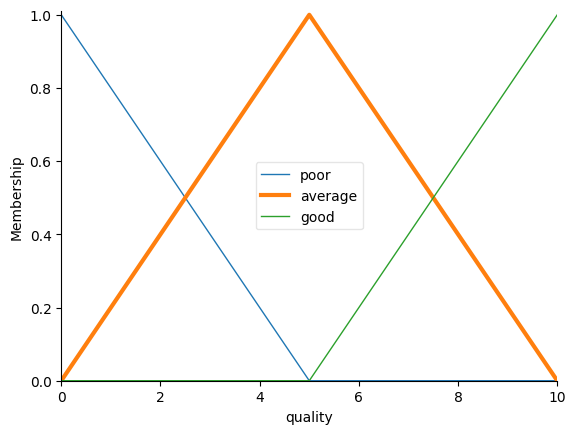

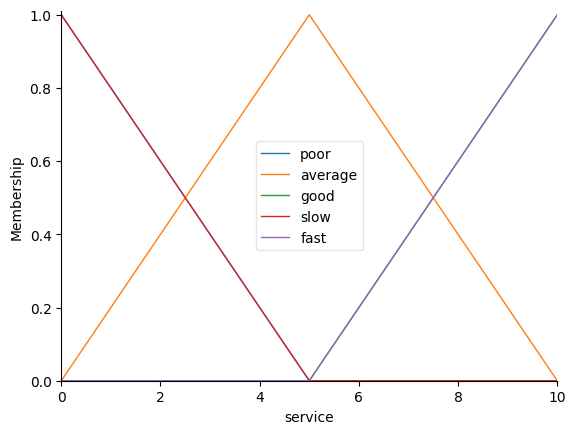

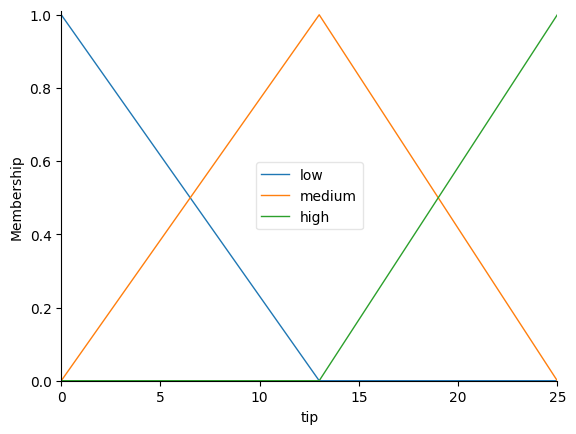

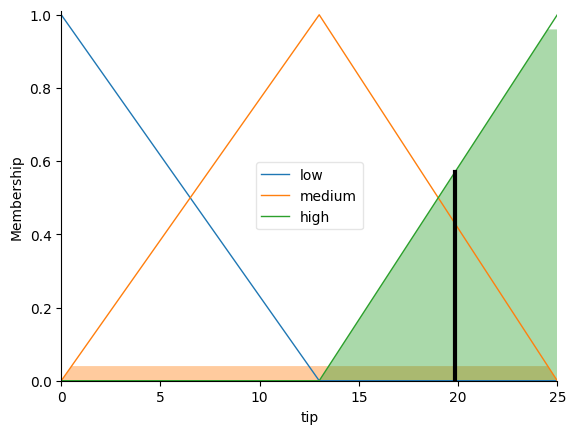

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['slow'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['fast'] = fuzz.trimf(service.universe, [5, 10, 10])

quality['average'].view()
service.view()
tip.view()

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

In [2]:
!pip install -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.5 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=108c91989371687063bc8fab285d7707f765236a6c419c72d24c1937e5f5fe0d
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [5]:
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
import random

In [6]:
distance_matrix = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

  ]



cost_matrix = []


def setCost():
  for i in range(12):
    cost_matrix.append(random.randint(10, 80))
  print(cost_matrix)


setCost()

def setDistance():
  for i in range(12):
    for j in range(12):
      if (i == j):
        distance_matrix[i][j] = 0
      else:
        distance_matrix[i][j] = random.randint(1, 200)

  print(pd.DataFrame(distance_matrix))

setDistance()

def getDistance(i, j):
  return distance_matrix[i][j]

def getCost(i):
  return cost_matrix[i]

[54, 12, 49, 66, 18, 24, 43, 60, 63, 13, 46, 26]
     0    1    2    3    4    5    6    7    8    9    10   11
0     0  123  140  172   34   88  141   93  164  120  178  197
1     2    0  106   86   14   77  116   46   58   70  130   66
2   180  107    0    8   64  115   50  148   67  156   37  143
3    26   68  166    0   10  127   87  102  169   15   68  167
4    36   28  147  104    0  165  154  172   46   92  120  103
5   121   81   98   34  196    0   52  103   13  183  161  125
6    57  142   12  171   40   22    0  113   29  200  152  199
7    61  165   27   45  146  142  105    0  181   28  197  114
8   150   52    6  136   19  100   46   78    0   72   89   54
9   180  188   49  142   42   37   60  125   85    0  131   28
10  154    1   47   47  105  148  147  172   80   62    0   67
11  113   92   97   90   93  164  118   27  144   56  117    0


In [ ]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population

hotels = [0, 1, 2, 3]
restaurants = [4, 5, 6, 7]
science_spots = [8, 9, 10, 11]
locations = hotels + restaurants + science_spots

pop_size = 5
mt = 4

initial_population = []
for _ in range(pop_size):
    route = random.sample(locations, mt)
    initial_population.append(route)

initial_population = np.array(initial_population, dtype=int)

for route in initial_population:
   distance = 0
   cost = 0
   for i in range(len(route) - 1):
      start, end = route[i], route[i + 1]
      # print(getDistance(start, end))
      distance += getDistance(start, end)

   for j in range(len(route)):
      cost += getCost(route[j])

   print(f"{route} => distance : {distance}, cost: {cost}")

initial_population = Population.new("X", initial_population)


class HotelRouteProblem(Problem):
    def __init__(self):
        super().__init__(n_var=mt, n_obj=2, n_constr=0, xl=0, xu=len(locations) - 1, type_var=int)  # n_obj=2 برای بهینه‌سازی چندهدفه

    def _evaluate(self, x, out, *args, **kwargs):
        total_distance = []
        total_cost = []
        for route in x:
            route = route.astype(int)
            distance = 0
            cost = 0
            for i in range(len(route) - 1):
                start, end = route[i], route[i + 1]
                distance += getDistance(start, end)

            for j in range(len(route)):
                cost += getCost(route[j])

            total_distance.append(distance)
            total_cost.append(cost)

        out["F"] = np.column_stack([total_distance, total_cost])


problem = HotelRouteProblem()

algorithm = NSGA2(pop_size=pop_size, sampling=initial_population)

res = minimize(problem, algorithm, ('n_gen', 200), verbose=True)

best_index = np.argmin(res.F[:, 1])  # یافتن ایندکس با کمترین هزینه

best_route = res.X[best_index].astype(int)
best_distance = res.F[best_index, 0]
best_cost = res.F[best_index, 1]

print('---------------')
print("Best Route (order of locations):", best_route)
print("Best Distance:", best_distance)
print("Best Cost:", best_cost)


[ 6  8  9 11] => distance : 305, cost: 167
[0 3 4 7] => distance : 328, cost: 178
[ 6  7 10  9] => distance : 541, cost: 200
[9 8 2 1] => distance : 330, cost: 224
[10  6  9  0] => distance : 271, cost: 253
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        5 |      2 |             - |             -
     2 |       10 |      1 |  4.900000E+01 |         ideal
     3 |       15 |      4 |  0.7443609023 |         ideal
     4 |       20 |      5 |  0.000000E+00 |             f
     5 |       25 |      5 |  0.000000E+00 |             f
     6 |       30 |      5 |  0.000000E+00 |             f
     7 |       35 |      5 |  0.4956521739 |         ideal
     8 |       40 |      5 |  0.0211227264 |             f
     9 |       45 |      5 |  0.1142085599 |             f
    10 |       50 |      5 |  0.000000E+00 |             f
    11 |       55 |      5 |  0.000000E+00 |             f
    12 |       60 |      5 |  0.000000E+00 |             f
    13 |       65 |      5

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


الگوریتم فازی - برای هر هتل سه مقدار بدبینانه،خوش بینانه و متوسط رو در نظر می گیریم

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Alpha = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Alpha')
Alpha["low"] = fuzz.trimf(Alpha.universe, [0, 0, 0.5])
Alpha["Medium"] = fuzz.trimf(Alpha.universe, [0.25, 0.5, 0.75])
Alpha["high"] = fuzz.trimf(Alpha.universe, [0.5, 1, 1])

def compute_hotel_service_cost(low, high, alpha):
  medium = (high + low) / 2

  Cost = ctrl.Consequent(np.arange(0, 1001, 1), 'Cost')
  Cost["low"] = fuzz.trimf(Cost.universe, [0, 0, medium])
  Cost["Medium"] = fuzz.trimf(Cost.universe, [(low + medium) / 2, medium, (high + medium) / 2])
  Cost["high"] = fuzz.trimf(Cost.universe, [medium, high, high])



  # Alpha.view()
  # Cost.view()


  rule1 = ctrl.Rule(Alpha['low'], Cost['low'])
  rule2 = ctrl.Rule(Alpha['Medium'], Cost['Medium'])
  rule3 = ctrl.Rule(Alpha['high'], Cost['high'])

  CostCondition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
  CostCondition = ctrl.ControlSystemSimulation(CostCondition_ctrl)


  CostCondition.input['Alpha'] = alpha

  CostCondition.compute()

  print(CostCondition.output['Cost'])
  # Cost.view(sim=CostCondition)



hotels = [
    {'low': 50, 'high': 250},
    {'low': 200, 'high': 500},
    {'low': 300, 'high': 600},
]


for i, hotel in enumerate(hotels):
  low = hotel['low']
  high = hotel['high']
  alpha = 0.9

  compute_hotel_service_cost(low, high, alpha)


46.944218357553886


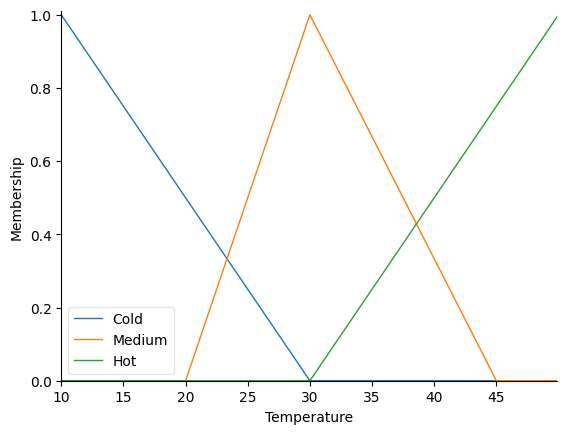

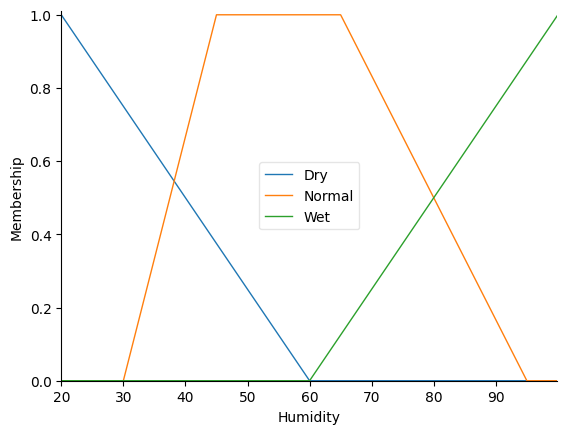

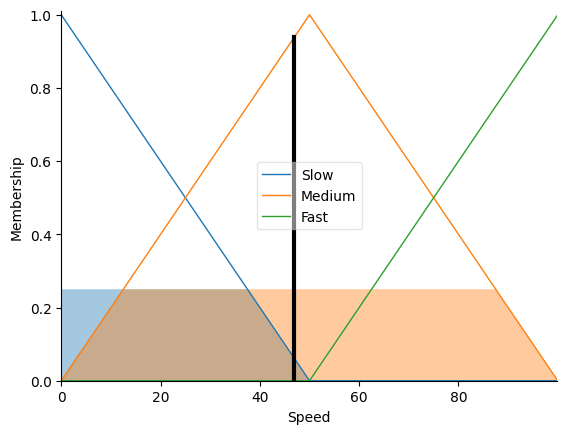

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Temperature = ctrl.Antecedent(np.arange(10, 50, 0.1), 'Temperature')
Temperature["Cold"] = fuzz.trimf(Temperature.universe, [10, 10, 30])
Temperature["Medium"] = fuzz.trimf(Temperature.universe, [20, 30, 45])
Temperature["Hot"] = fuzz.trimf(Temperature.universe, [30, 50, 50])


Humidity = ctrl.Antecedent(np.arange(20, 100, 0.1), 'Humidity')
Humidity["Dry"] = fuzz.trimf(Humidity.universe, [20, 20, 60])
Humidity["Normal"] = fuzz.trapmf(Humidity.universe, [30, 45, 65, 95])
Humidity["Wet"] = fuzz.trimf(Humidity.universe, [60, 100, 100])

Speed = ctrl.Consequent(np.arange(0, 100, 0.1), 'Speed')
Speed["Slow"] = fuzz.trimf(Speed.universe, [0, 0, 50])
Speed["Medium"] = fuzz.trimf(Speed.universe, [0, 50, 100])
Speed["Fast"] = fuzz.trimf(Speed.universe, [50, 100, 100])

Temperature.view()
Humidity.view()



rule1 = ctrl.Rule(Temperature['Cold'] & Humidity['Wet'], Speed['Slow'])
rule2 = ctrl.Rule(Temperature['Cold'] & Humidity['Normal'], Speed['Slow'])
rule3 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Slow'])

rule4 = ctrl.Rule(Temperature['Cold'] & Humidity['Dry'], Speed['Medium'])
rule5 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Medium'])
rule6 = ctrl.Rule(Temperature['Hot'] & Humidity['Wet'], Speed['Medium'])

rule7 = ctrl.Rule(Temperature['Medium'] & Humidity['Dry'], Speed['Fast'])
rule8 = ctrl.Rule(Temperature['Hot'] & Humidity['Normal'], Speed['Fast'])
rule9 = ctrl.Rule(Temperature['Hot'] & Humidity['Dry'], Speed['Fast'])


AirCondition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
AirCondition = ctrl.ControlSystemSimulation(AirCondition_ctrl)

AirCondition.input['Temperature'] = 25
AirCondition.input['Humidity'] = 70

AirCondition.compute()

print(AirCondition.output['Speed'])
Speed.view(sim=AirCondition)


In [19]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
from pymoo.core.crossover import Crossover

# تعریف مکان‌ها
locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
hotels = [0, 1, 2, 3]
restaurants = [4, 5, 6, 7]
science_spots = [8, 9, 10, 11]



class CustomCrossover(Crossover):
    def __init__(self):
        # تعداد والدین و تعداد فرزندان را مشخص می‌کنیم
        super().__init__(n_parents=2, n_offsprings=2)

    def _do(self, problem, X, **kwargs):



        n_matings, n_parents, n_var = X.shape

        offsprings = np.empty((n_matings, self.n_offsprings, n_var), dtype=X.dtype)

        for i in range(n_matings):
            parent1, parent2 = X[i, 0, :], X[i, 1, :]

            point = np.random.randint(1, n_var)  # نقطه برش
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])

            # افزودن فرزندان به آرایه
            offsprings[i, 0, :] = child1
            offsprings[i, 1, :] = child2
        print(f"Offsprings Shape: {offsprings.shape}")
        assert offsprings.shape == (n_matings, self.n_offsprings, n_var), "Incorrect offspring shape!"


        return offsprings


def isValidSingle(solution):
  sum = 0
  for i in range(len(solution)):
    for j in range(len(solution)):
      if (solution[i] == solution[j]) and (i != j):
        sum += 1
  return sum

def isValidSolution(solution):
  sum = 0
  for i in range(len(solution)):
    if solution[i] in (4,5,6,7):
      sum += 1
  return sum


# مدل و الگوریتم NSGA-II
class HotelRouteProblem(Problem):
    def __init__(self):
        super().__init__(n_var=5, n_obj=2, n_constr=0, xl=0, xu=len(locations) - 1, type_var=int)

    def _evaluate(self, x, out, *args, **kwargs):
        total_distance = []
        total_cost = []
        for route in x:
            route = route.astype(int)
            distance = 0
            cost = 0
            for i in range(len(route) - 1):
                start, end = route[i], route[i + 1]
                distance += getDistance(start, end)

            for j in range(len(route)):
                cost += getCost(route[j])

            total_distance.append(distance)
            total_cost.append(cost)

        out["F"] = np.column_stack([total_distance, total_cost])

# تولید جمعیت اولیه
pop_size = 50
mt = 5
initial_population = []

c = 0

while c <= pop_size:
  route = random.sample(locations, mt)
  if isValidSolution(route):
    continue
  if isValidSingle(route) > 0:
    continue
  else:
    initial_population.append(route)
    c += 1

initial_population = np.array(initial_population)


print(initial_population)





algorithm = NSGA2(pop_size=100)

algorithm = NSGA2(pop_size=pop_size, crossover=CustomCrossover())


def callback_function(algorithm):
    population = algorithm.pop.get("X")

    for i in range(len(population)):
        population[i] = [int(item) for item in population[i]]
    print(population)
    algorithm.pop.set("X", population)

res = minimize(HotelRouteProblem(), algorithm, termination=('n_gen', 100), verbose=True)

best_index = np.argmin(res.F[:, 1])
best_route = res.X[best_index].astype(int)
best_distance = res.F[best_index, 0]
best_cost = res.F[best_index, 1]

print('---------------')
print("Best Route (order of locations):", best_route)
print("Best Distance:", best_distance)
print("Best Cost:", best_cost)


[[10  3  8  9 11]
 [10 11  2  3  1]
 [ 8  9  3  1 10]
 [10 11  1  9  0]
 [11  3  8  9  1]
 [ 0  2  9  1 10]
 [ 1 10  3  9  0]
 [ 9 11 10  8  0]
 [ 8  1 10 11  2]
 [10  8  1  9 11]
 [ 2  1 10  8  0]
 [10  2  1  9  3]
 [ 3  2  8  0 11]
 [11  9  3  1  2]
 [ 2  3  9  0 10]
 [ 1  0 10  8 11]
 [ 1  0  9 10 11]
 [ 0  3  2  9  1]
 [ 9 11  8  1  0]
 [ 0 10  2  3  1]
 [ 3  8 10  0  9]
 [11  3  8 10  1]
 [ 1  8  2 10  3]
 [ 0  3  8  9  2]
 [ 9  0  2  8 10]
 [ 3  9  8 11  2]
 [ 3  9 11  1  0]
 [ 8  3  0 10  9]
 [ 9  2  3  0 11]
 [11  2  0  3  9]
 [ 9  3  1 11  2]
 [ 3  0  8  9  1]
 [ 2  9  8  0  1]
 [11  8  2 10  9]
 [11  8  3  2  9]
 [ 0  1  9  3  2]
 [ 2  3  1  8 11]
 [ 1  3 11  0  8]
 [10  1  0  8  2]
 [10  3  0  1  9]
 [ 0  8  9 10  2]
 [ 8  9 11  0  3]
 [ 2 10  8  0 11]
 [ 3  0 10  9  1]
 [ 0  2 11  9 10]
 [10 11  9  8  3]
 [10  9  1  8  3]
 [11  8  0  3 10]
 [ 1  0  3  9 10]
 [10  0  2  8  9]
 [ 1  3 11  9  2]]
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |   

AssertionError: Shape is incorrect of crossover impl.